<a href="https://colab.research.google.com/github/nishnarudkar/Solar_Radiation_Prediction/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
file_path = '/content/Solar_radiation_classification.csv'
data = pd.read_csv(file_path)

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing values in the dataset:")
print(data.isnull().sum())


First 5 rows of the dataset:
   Air Temperature (C°)  Air Temperature Uncertainty (C°)  \
0              1.232271                         -0.039841   
1              0.823413                         -0.039841   
2             -0.078894                         -0.039841   
3             -0.924807                         -0.039841   
4             -1.714325                         -0.039841   

   Wind Direction at 3m (°N)  Wind Direction at 3m Uncertainty (°N)  \
0                  -1.325218                               0.163933   
1                  -1.025486                               0.163933   
2                  -0.875620                               0.163933   
3                  -1.000508                               1.188516   
4                  -0.983856                               0.163933   

   Wind Speed at 3m (m/s)  Wind Speed at 3m Uncertainty (m/s)  \
0               -1.216819                           -1.548603   
1               -1.324929                      

In [4]:
# Encode categorical variables (if any)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [6]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual target column
y = data['Class']

In [7]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Train a classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 59   0   0]
 [  0 107   0]
 [  0   0  87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        87

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253


Accuracy Score:
1.0


In [12]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")


Accuracy of the model: 100.00%


In [13]:
print("Class distribution in the target:")
print(y.value_counts())


Class distribution in the target:
Class
1    576
2    430
0    256
Name: count, dtype: int64


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        87

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



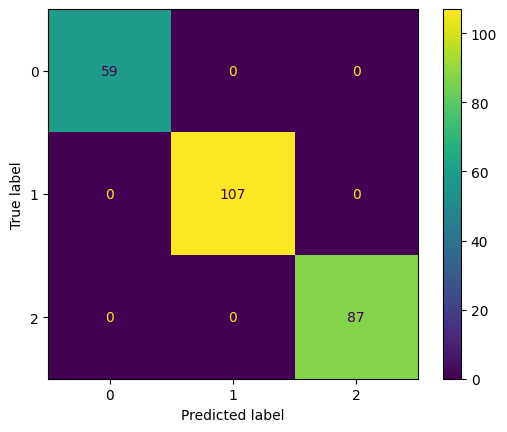

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=[0, 1, 2])


In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean() * 100:.2f}% ± {scores.std() * 100:.2f}%")


Cross-validation accuracy: 99.37% ± 0.54%


In [15]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 100.00%
Test Accuracy: 100.00%


In [19]:
#Comparing with different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()
    std_cv_accuracy = cv_scores.std()

    # Fit and evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        "Cross-Validation Accuracy": f"{mean_cv_accuracy * 100:.2f}% ± {std_cv_accuracy * 100:.2f}%",
        "Test Accuracy": f"{test_accuracy * 100:.2f}%",
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Display results
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Cross-Validation Accuracy: {result['Cross-Validation Accuracy']}")
    print(f"Test Accuracy: {result['Test Accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(result["Classification Report"]).transpose())



Model: Logistic Regression
Cross-Validation Accuracy: 97.07% ± 0.60%
Test Accuracy: 96.84%
Classification Report:
              precision    recall  f1-score     support
0              0.950820  0.983051  0.966667   59.000000
1              0.980583  0.943925  0.961905  107.000000
2              0.966292  0.988506  0.977273   87.000000
accuracy       0.968379  0.968379  0.968379    0.968379
macro avg      0.965898  0.971827  0.968615  253.000000
weighted avg   0.968728  0.968379  0.968300  253.000000

Model: K-Nearest Neighbors
Cross-Validation Accuracy: 85.03% ± 3.34%
Test Accuracy: 85.77%
Classification Report:
              precision    recall  f1-score     support
0              0.787879  0.881356  0.832000   59.000000
1              0.838095  0.822430  0.830189  107.000000
2              0.939024  0.885057  0.911243   87.000000
accuracy       0.857708  0.857708  0.857708    0.857708
macro avg      0.854999  0.862948  0.857810  253.000000
weighted avg   0.861092  0.857708  0.85848

In [20]:
#Checking Out-of-Bag (OOB) Error
#If the OOB score is close to the cross-validation and test accuracies, the model is likely robust.
rf = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
print("Out-of-Bag Accuracy:", rf.oob_score_)


Out-of-Bag Accuracy: 0.9940535183349851


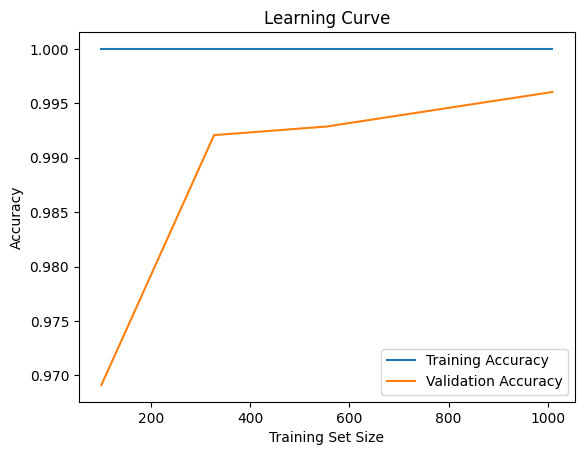

In [21]:
#Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    X, y, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [22]:
RandomForestClassifier(max_depth=10)
RandomForestClassifier(min_samples_split=5)
RandomForestClassifier(min_samples_leaf=2)
RandomForestClassifier(n_estimators=50)
RandomForestClassifier(max_features='sqrt')
RandomForestClassifier(max_samples=0.8)  # Use 80% of the training data for each tree.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(f"Mean CV Accuracy: {scores.mean()}")
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
RandomForestClassifier(class_weight='balanced')


Mean CV Accuracy: 0.9936633414894285


RandomForestClassifier(class_weight='balanced')

**Logistic Regression model**

In [23]:
# Apply standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
#Train Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [25]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Mean CV Accuracy: 0.9594 ± 0.0135


In [26]:
#Test Performance
from sklearn.metrics import classification_report, accuracy_score
y_pred = lr.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9683794466403162
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.98      0.94      0.96       107
           2       0.97      0.99      0.98        87

    accuracy                           0.97       253
   macro avg       0.97      0.97      0.97       253
weighted avg       0.97      0.97      0.97       253



In [30]:
feature_names = data.columns
print(feature_names)


Index(['Air Temperature (C°)', 'Air Temperature Uncertainty (C°)',
       'Wind Direction at 3m (°N)', 'Wind Direction at 3m Uncertainty (°N)',
       'Wind Speed at 3m (m/s)', 'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)',
       'Class'],
      dtype='object')


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9723
Confusion Matrix:
[[ 58   1   0]
 [  2 102   3]
 [  0   1  86]]


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'C': 10, 'penalty': 'l2'}


In [38]:
#Comparing Random forest and Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize both models
lr = LogisticRegression()
rf = RandomForestClassifier()

# Train both models
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # Random Forest does not need scaling

# Make predictions with both models
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Evaluate the performance of both models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print confusion matrices and classification reports
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Optionally, compare Feature Importance (Random Forest only)
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
print("\nRandom Forest Feature Importance:")
print(feature_importance_rf.sort_values(by='Importance', ascending=False))


Logistic Regression Accuracy: 0.9683794466403162
Logistic Regression Confusion Matrix:
 [[ 58   1   0]
 [  3 101   3]
 [  0   1  86]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.98      0.94      0.96       107
           2       0.97      0.99      0.98        87

    accuracy                           0.97       253
   macro avg       0.97      0.97      0.97       253
weighted avg       0.97      0.97      0.97       253


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[ 59   0   0]
 [  0 107   0]
 [  0   0  87]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        87

    accuracy                           1.00       253
   macro avg       1.00

In [40]:
#Hypertuning for Logistic Regression
# Define hyperparameter grid (only 'l2' penalty for lbfgs solver)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # Use only l2 penalty
    'solver': ['lbfgs']  # lbfgs solver supports only l2 penalty
}

# Grid search for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)


Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [41]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_lr)
print("Average CV Score:", cv_scores_lr.mean())

Logistic Regression Cross-Validation Scores: [0.98514851 0.95049505 0.96039604 0.95049505 0.95024876]
Average CV Score: 0.9593566819368504


In [43]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)  # Increase max_iter if needed
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Example: Polynomial Features for Logistic Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Logistic Regression on polynomial features
lr.fit(X_train_poly, y_train)


LogisticRegression(max_iter=200)

In [46]:
import joblib


joblib.dump(grid_search_lr.best_estimator_, 'logistic_regression_classification_model_best_model.pkl')

['logistic_regression_classification_model_best_model.pkl']